In [1]:
import filemapper as fm
from astropy.io import fits
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [2]:
def convert_ra_dec_to_galactic2000(ra,dec): 
    x0 = np.cos(np.radians(dec))*np.cos(np.radians(ra))
    x1 = np.cos(np.radians(dec))*np.sin(np.radians(ra))
    x2 = np.sin(np.radians(dec))

    R = np.matrix([[-0.054876,-0.873437,-0.483835],[0.494109,-0.444830,0.746982],[-0.867666,-0.198076,0.455984]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(R,x)

    l = float(np.degrees(np.arctan2(xp[1],xp[0])) ) + 360
    b = float(np.degrees(np.arcsin(xp[2])))

    return l,b

In [81]:
spur635 = sorted(glob.glob('420_data/LO_635*'))
spur636 = sorted(glob.glob('420_data/LO_636*'))

In [6]:
def get_info(filename):
    x = fits.open(filename)
    x0 = x[0]
    xHead = x0.header
    res = xHead['RES']
    nchan = xHead['NCHAN']
    l = xHead['L']
    b = xHead['B']
    jd = xHead['JD']
    ra = xHead['RA']
    dec = xHead['DEC']
    spec = xHead['NSPEC']
    polar_1st = np.array([x[i+1].data['auto0_real'] for i in range(int(x[0].header['NSPEC']))])
    polar_2nd = np.array([x[i+1].data['auto1_real'] for i in range(int(x[0].header['NSPEC']))])

    avg1 = np.mean(polar_1st, axis = 0)
    avg2 = np.mean(polar_2nd, axis = 0)
    
    x.close()
    
    return res, nchan, l, b, jd, ra, dec, avg1, avg2

In [82]:
RES635 = []
NCHAN635 = []
L635 = []
B635 = []
POLAR1635 = []
POLAR2635 = []
JD635 = []
RA635 = []
DEC635 = []

for i in range(int(len(spur635))):
    r , ch, l , b, jd, ra, dec, av1, av2  = get_info(spur635[i])
    RES635.append(r)
    NCHAN635.append(ch)
    L635.append(l)
    B635.append(b)
    POLAR1635.append(av1)
    POLAR2635.append(av2)
    JD635.append(jd)
    RA635.append(ra)
    DEC635.append(dec)

In [83]:
RES636 = []
NCHAN636 = []
L636 = []
B636 = []
POLAR1636 = []
POLAR2636 = []
JD636 = []
RA636 = []
DEC636 = []

for i in range(int(len(spur636))):
    r , ch, l , b, jd, ra, dec, av1, av2  = get_info(spur636[i])
    RES636.append(r)
    NCHAN636.append(ch)
    L636.append(l)
    B636.append(b)
    POLAR1636.append(av1)
    POLAR2636.append(av2)
    JD636.append(jd)
    RA636.append(ra)
    DEC636.append(dec)

In [72]:
len(ra635)

1426

In [76]:
len(RA636)

1426

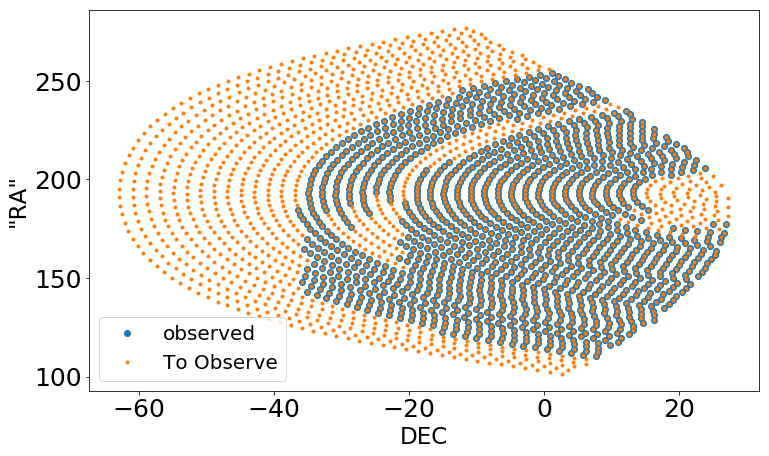

In [84]:
ra635 = np.copy(RA635)
dec635 = np.copy(DEC635)
for i,r in enumerate(ra635):
    if r < 0:
        ra635[i] = ra635[i] + 360
        
plt.figure(figsize = (12,7))
plt.plot(dec635,ra635,'o', label = 'observed')
plt.plot(decCop,raCop, '.', label='To Observe')
plt.xlabel('DEC',fontsize = 23)
plt.ylabel('"RA"',fontsize = 23)
plt.tick_params(labelsize = 25)
plt.legend(fontsize = 20)

In [24]:
ra = np.copy(RA)
dec = np.copy(DEC)

In [25]:
for i,r in enumerate(ra):
    if r < 0:
        ra[i] = ra[i] + 360
        

In [43]:
coord = np.load('420_data/NPS_modified_path_ra_dec.npz')

In [49]:
raObs = coord['arr_0']
decObs = coord['arr_1']

raCop = np.copy(raObs)
decCop = np.copy(decObs)

for i,r in enumerate(raObs):
    if r < 0:
        raCop[i] = raCop[i] + 360
        

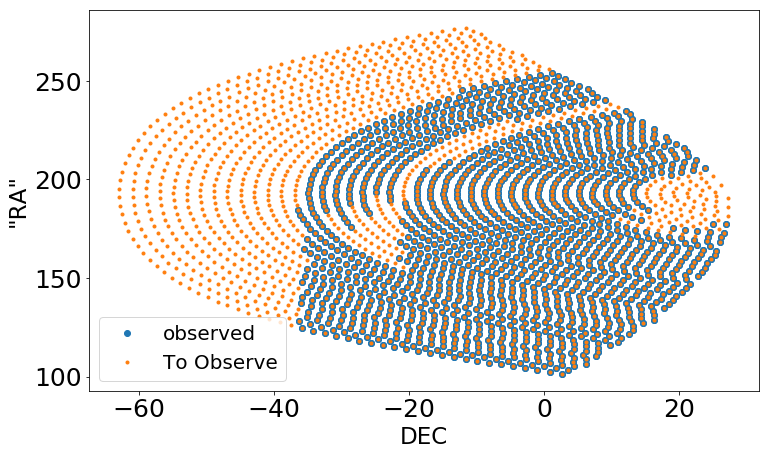

In [53]:
plt.figure(figsize = (12,7))
plt.plot(dec,ra,'o', label = 'observed')
plt.plot(decCop,raCop, '.', label='To Observe')
plt.xlabel('DEC',fontsize = 23)
plt.ylabel('"RA"',fontsize = 23)
plt.tick_params(labelsize = 25)
plt.legend(fontsize = 20)

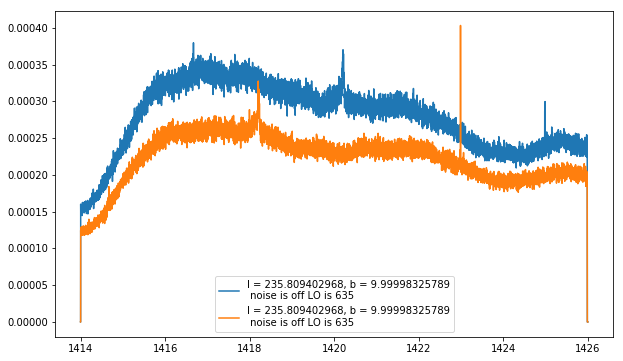

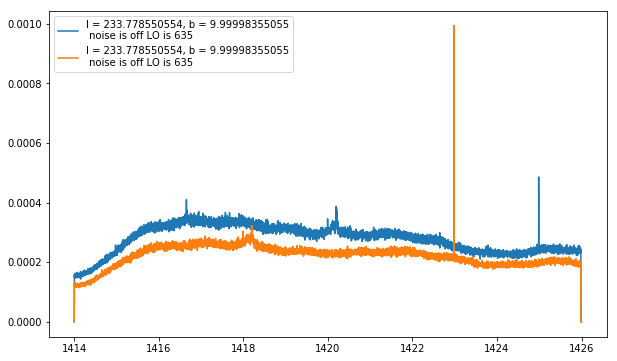

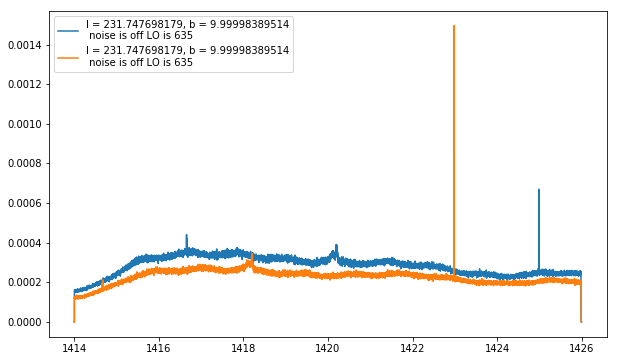

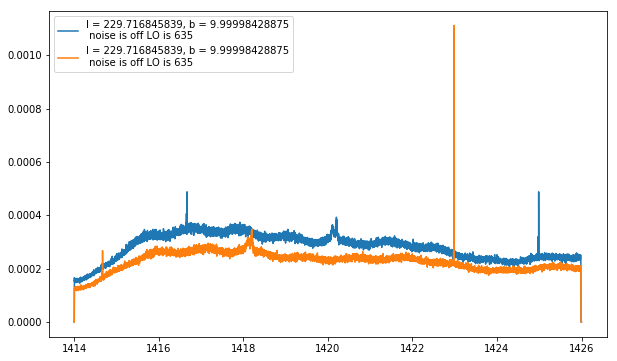

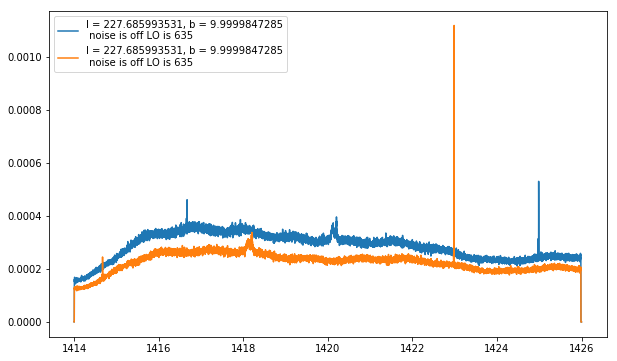

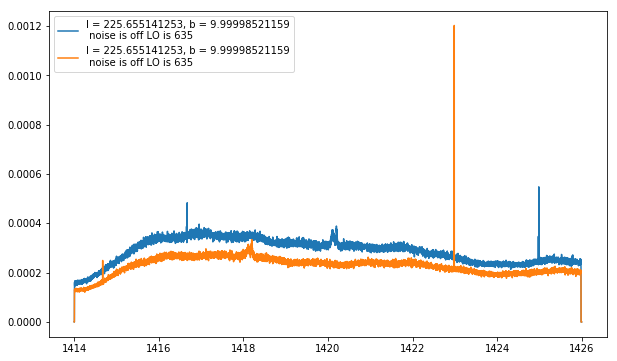

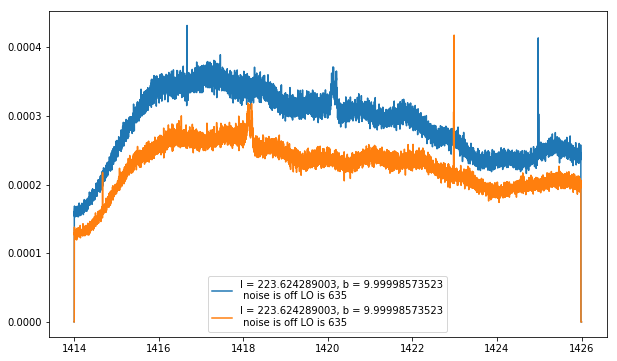

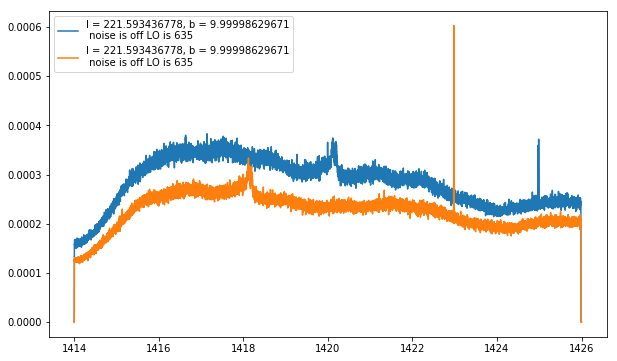

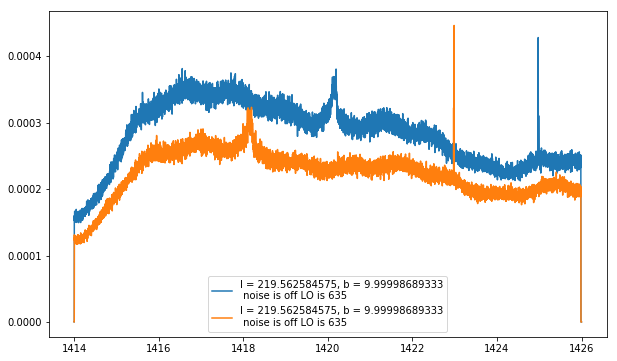

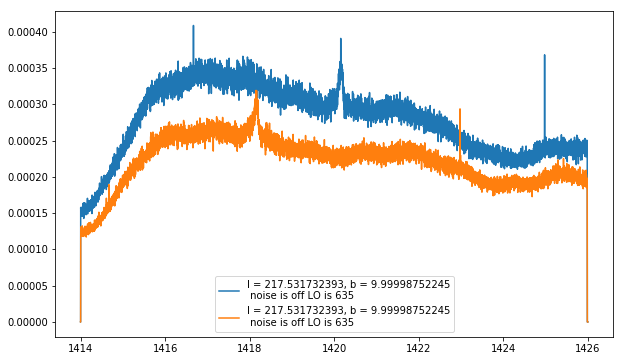

In [89]:
noise = 'off'

for fi5,fi6 in zip(spur635[:10],spur636[:10]):
    spurDAT5 = fits.open(fi5,ignore_missing_end=True)
    spurINFO5 = spurDAT5[0]
    spurHEAD5 = spurINFO5.header
    spurSUM5 = np.zeros(8192)
    res5 = spurHEAD5['RES']
    nchan5 = spurHEAD5['NCHAN']
    nspec5 = spurHEAD5['NSPEC']
    LO5 = 635
    
    spurDAT6 = fits.open(fi6,ignore_missing_end=True)
    spurINFO6 = spurDAT6[0]
    spurHEAD6 = spurINFO6.header
    spurSUM6 = np.zeros(8192)
    res6 = spurHEAD6['RES']
    nchan6 = spurHEAD6['NCHAN']
    nspec6 = spurHEAD6['NSPEC']
    LO6 = 636
#     if ct % 5 == 0:
#         LO = 635
#         noise = 'off'
#     if ct % 10 == 0:
#         LO = 636
#         noise = 'on'
#     if ct % 20 == 0:
#         LO = 635
#         noise = 'off'
    freqs5 = (np.arange(nchan5) * res5*u.Hz + 2 * LO5 * u.MHz + 144 * u.MHz).to(u.MHz).value
    freqs6 = (np.arange(nchan6) * res6*u.Hz + 2 * LO6 * u.MHz + 144 * u.MHz).to(u.MHz).value
    
    for i in np.arange(1,nspec5):
        spurSUM5 += spurDAT5[i].data['auto1_real']
        spurSUM5 = spurSUM5/5.
        spurRA5 = spurHEAD5['RA']
        spurDEC5 = spurHEAD5['DEC']
        spurl5,spurb5 = convert_ra_dec_to_galactic2000(spurRA5, spurDEC5)
        
        spurSUM6 += spurDAT6[i].data['auto1_real']
        spurSUM6 = spurSUM6/6.
        spurRA6 = spurHEAD6['RA']
        spurDEC6 = spurHEAD6['DEC']
        spurl6,spurb6 = convert_ra_dec_to_galactic2000(spurRA6, spurDEC6)
        
    plt.figure(figsize = (10,6))
    plt.plot(freqs5, spurSUM5, label = 'l = {}, b = {}\n noise is {} LO is {}'.format(spurl5,spurb5, noise, LO5))
    plt.plot(freqs5, spurSUM6, label = 'l = {}, b = {}\n noise is {} LO is {}'.format(spurl6,spurb6, noise, LO5))
    plt.legend()